<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/K_NEAREST_NEIGHBOR_MODEL_TO_PREDICT_LOAN_DEFAUTERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
loan = pd.read_csv('/content/loan-train.csv')
loan.head(n = 6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
loan.shape

(614, 13)

In [ ]:
loan.isnull().sum()*100/len(loan)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
correlation = loan.corr()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


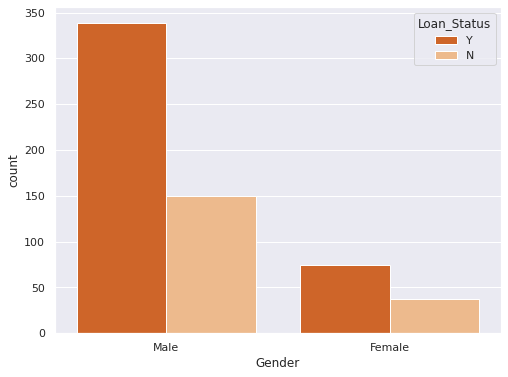

In [ ]:
sns.set()

plt.figure(figsize = (8,6))
sns.countplot(loan['Gender'], hue = 'Loan_Status', data = loan, palette = 'Oranges_r')




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


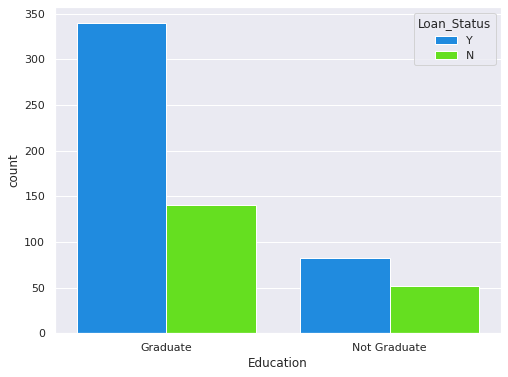

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(loan['Education'], hue = 'Loan_Status', data = loan, palette = 'gist_rainbow_r')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Property_Area')

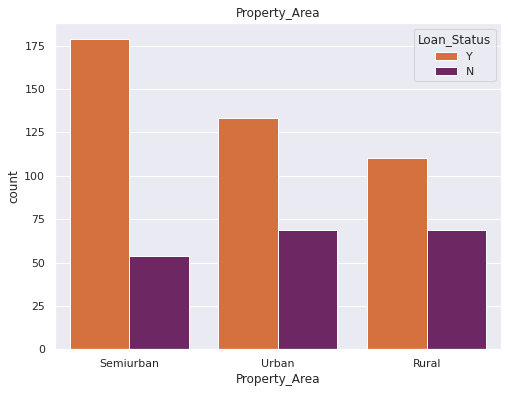

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(loan['Property_Area'], hue = 'Loan_Status',
              data = loan,
              palette = 'inferno_r',
              order = loan['Property_Area'].value_counts().index)
plt.title('Property_Area')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Self_Employed ?')

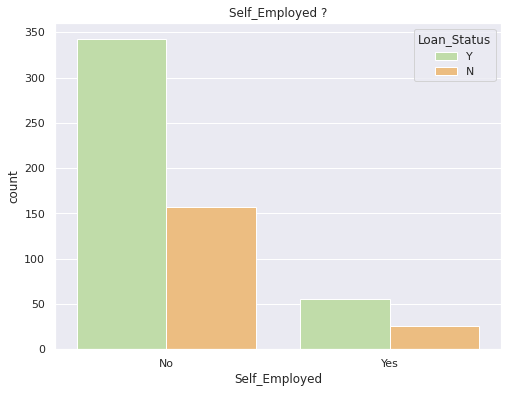

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(loan['Self_Employed'], hue = 'Loan_Status', data = loan, palette = 'Spectral_r')
plt.title('Self_Employed ?')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


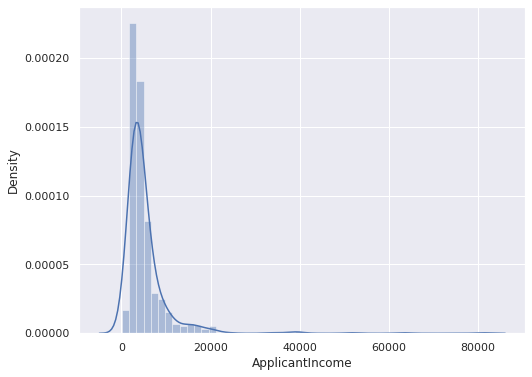

In [ ]:
plt.figure(figsize = (8,6))
sns.distplot(loan['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


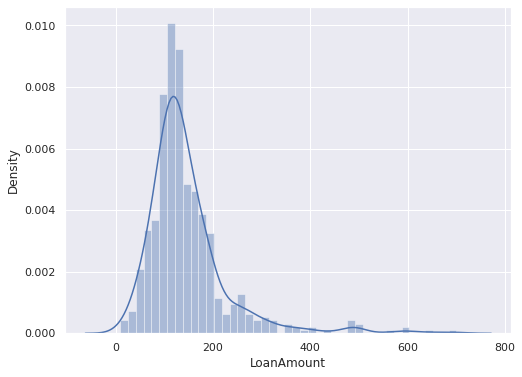

In [ ]:
plt.figure(figsize = (8,6))
sns.distplot(loan['LoanAmount'])

Data Preprocessing

In [ ]:
loan[['Gender']] = loan[['Gender']].fillna(method = 'ffill')
loan[['Married']] = loan[['Married']].fillna(method = 'ffill')
loan[['Dependents']] = loan[['Dependents']].fillna(method = 'ffill')
loan[['Self_Employed']] = loan[['Self_Employed']].fillna(method = 'ffill')
loan[['Credit_History']] = loan[['Credit_History']].fillna(method = 'ffill')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace = True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(), inplace = True)

loan.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
loan.replace({'Gender' : {'Male' : 0, 'Female' : 1},
              'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
              'Married': {'Yes': 0, 'No': 1},
              'Education': {'Graduate': 0, 'Not Graduate': 1},
              'Self_Employed': {'Yes': 0, 'No': 1},
              'Property_Area': {'Semiurban': 0, 'Urban': 1, 'Rural': 2}#,
              #'Loan_Status': {'Y': 0, 'N':1}
              }, inplace = True)
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [ ]:
loan['Self_Employed'].value_counts()

1    528
0     86
Name: Self_Employed, dtype: int64

In [ ]:
loan.sample(n = 7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
208,LP001699,0,1,0,0,1,2479,0.0,59.0,360.0,1.0,1,Y
331,LP002098,0,1,0,0,1,2935,0.0,98.0,360.0,1.0,0,Y
420,LP002348,0,0,0,0,1,5829,0.0,138.0,360.0,1.0,2,Y
24,LP001052,0,0,1,0,1,3717,2925.0,151.0,360.0,0.0,0,N
260,LP001865,0,0,1,0,1,6083,4250.0,330.0,360.0,1.0,1,Y
609,LP002978,1,1,0,0,1,2900,0.0,71.0,360.0,1.0,2,Y
556,LP002794,1,1,0,0,1,2667,1625.0,84.0,360.0,1.0,1,Y


SPLITTING THE DATA

In [ ]:
x = loan.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
y = loan['Loan_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
print(x_train.shape, y_test.shape)

(491, 11) (123,)


Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train.std(), x_test.std())

1.0 1.0722806422322864


Building The Model

In [ ]:
model = KNeighborsClassifier(n_neighbors= 2)

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Evaluating the model

In [ ]:
train_pred = model.predict(x_train)
print(classification_report(train_pred, y_train))


              precision    recall  f1-score   support

           N       1.00      0.72      0.84       213
           Y       0.82      1.00      0.90       278

    accuracy                           0.88       491
   macro avg       0.91      0.86      0.87       491
weighted avg       0.90      0.88      0.87       491



Predicting the model

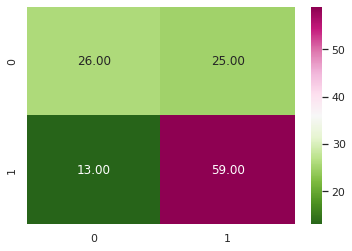

In [ ]:
test_pred = model.predict(x_test)
cmt = confusion_matrix(test_pred, y_test)
axl = sns.heatmap(cmt, cmap = 'PiYG_r', annot = True, fmt ='.2f')
axl

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_pred, y_train)

0.8778004073319755

This is the ratio of true Positive to the total number of predicted positive

In [ ]:
#precision_score(train_pred, y_train)

This is the ratio of true Positive to the total number of actual positive

In [ ]:
#recall_score(train_pred, y_train)

In [ ]:
input_data = (0,	0,	1,	0,	1,	3717,	2925.0,	151.0,	360.0,	0.0,	0	)

input_data = np.array(input_data)

input_data = input_data.reshape(1,-1)

output = scaler.transform(input_data)

output = model.predict(input_data)


if output == 'Y':
  print('He is not defaulters')
else:
  print("He is a defaulters")

He is a defaulters


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
msg = 'hello {} world'.format('fig')

In [ ]:
msg

'hello fig world'